# Study of effect of national factors on home prices in US
Task - Using publically available data for the national factors that impact supply and demand of homes in US, build a model to study the effect of these variables on home prices.


As a proxy to the home prices, S&P CASE-SHILLER Index is used.

Most of the data is downloaded from [https://fred.stlouisfed.org/].

Data for all the variables is downloaded, preprocessed and combined to create a datset. Data for different variables had different frequencies. So, to combine the data, necessary interpolations are made.

Linear Regression is used as most of the variables have high correlation with the target variable.

# import needed libraries 

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [134]:
#NEW CONSTRUCTION UNIT
c_u=pd.read_csv("COMPUTSA.csv")
c_u

,DATE,COMPUTSA
0,1968-01-01,1257.0
1,1968-02-01,1174.0
2,1968-03-01,1323.0
3,1968-04-01,1328.0
4,1968-05-01,1367.0
...,...,...
671,2023-12-01,1557.0
672,2024-01-01,1504.0
673,2024-02-01,1698.0
674,2024-03-01,1495.0


In [135]:
#TOTAL HOUSEHOLD
t_h=pd.read_csv("TTLHH.csv")
t_h

,DATE,TTLHH
0,1940-01-01,34949
1,1941-01-01,.
2,1942-01-01,.
3,1943-01-01,.
4,1944-01-01,.
...,...,...
79,2019-01-01,128579.0
80,2020-01-01,128451.0
81,2021-01-01,129224.0
82,2022-01-01,131202.0


In [136]:
#CONSTRUCTION PRICE
c_p=pd.read_csv("WPUSI012011.csv",names = ["DATE", "Cons_Materials"], skiprows = 1)
c_p.tail()

,DATE,Cons_Materials
923,2023-12-01,327.644
924,2024-01-01,334.259
925,2024-02-01,337.658
926,2024-03-01,333.566
927,2024-04-01,332.277


In [137]:
#PERSONAL INCOME
inc=pd.read_csv("DSPIC96.csv", names=["DATE", "Income"],skiprows=1)
inc

,DATE,Income
0,1959-01-01,2318.4
1,1959-02-01,2325.4
2,1959-03-01,2338.7
3,1959-04-01,2353.8
4,1959-05-01,2366.6
...,...,...
778,2023-11-01,16912.1
779,2023-12-01,16946.5
780,2024-01-01,16947.4
781,2024-02-01,16931.1


In [138]:
#UNEMPLOYMENT RATE

u_r=pd.read_csv("UNRATE.csv")
u_r.tail()

,DATE,UNRATE
911,2023-12-01,3.7
912,2024-01-01,3.7
913,2024-02-01,3.9
914,2024-03-01,3.8
915,2024-04-01,3.9


In [139]:
#CASE-SHILLER Index HOME PRICE 

h_p=pd.read_csv("CSUSHPISA.csv")
h_p['year']=pd.DatetimeIndex(h_p["DATE"]).year
h_p['month']=pd.DatetimeIndex(h_p["DATE"]).month
h_p.tail()


,DATE,CSUSHPISA,year,month
441,2023-10-01,312.946,2023,10
442,2023-11-01,313.629,2023,11
443,2023-12-01,314.338,2023,12
444,2024-01-01,315.297,2024,1
445,2024-02-01,316.576,2024,2


In [140]:
#INTREST RATE

i_r=pd.read_csv("FEDFUNDS.csv")
i_r.head()

,DATE,FEDFUNDS
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83


In [141]:
# Urban Population Percent

df_urban = pd.read_csv("API_SP.URB.TOTL.IN.ZS_DS2_en_csv_v2_478649.csv", skiprows=3)
print(df_urban.shape)
df_urban=df_urban[df_urban['Country Name']=='United States']
df_ur=df_urban.transpose()
df_ur

(266, 69)


,251
Country Name,United States
Country Code,USA
Indicator Name,Urban population (% of total population)
Indicator Code,SP.URB.TOTL.IN.ZS
1960,69.996
...,...
2020,82.664
2021,82.873
2022,83.084
2023,NaN


In [142]:
# remove population of usa
dfg=df_ur
d=dfg.iloc[4:]
d

,251
1960,69.996
1961,70.377
1962,70.757
1963,71.134
1964,71.508
...,...
2020,82.664
2021,82.873
2022,83.084
2023,NaN


In [143]:
# MERGE ALL DATAS INTO ONE SET
new=pd.merge(i_r,h_p,how = 'right')
new=pd.merge(u_r,new,how = 'right')
new=pd.merge(inc,new,how = 'right')
new=pd.merge(c_u,new,how = 'right')
new=pd.merge(t_h,new,how = 'right')
new=pd.merge(c_p,new,how = 'right')
new

,DATE,Cons_Materials,TTLHH,COMPUTSA,Income,UNRATE,FEDFUNDS,CSUSHPISA,year,month
0,1987-01-01,107.600,89479,1862.0,6494.2,6.6,6.43,63.965,1987,1
1,1987-02-01,107.900,NaN,1771.0,6525.0,6.6,6.10,64.425,1987,2
2,1987-03-01,108.100,NaN,1694.0,6530.5,6.6,6.13,64.735,1987,3
3,1987-04-01,108.300,NaN,1735.0,6282.3,6.3,6.37,65.132,1987,4
4,1987-05-01,108.300,NaN,1713.0,6537.0,6.3,6.85,65.564,1987,5
...,...,...,...,...,...,...,...,...,...,...
441,2023-10-01,328.743,NaN,1382.0,16847.8,3.8,5.33,312.946,2023,10
442,2023-11-01,326.844,NaN,1466.0,16912.1,3.7,5.33,313.629,2023,11
443,2023-12-01,327.644,NaN,1557.0,16946.5,3.7,5.33,314.338,2023,12
444,2024-01-01,334.259,NaN,1504.0,16947.4,3.7,5.33,315.297,2024,1


In [144]:
round((new.isnull().sum() / len(new.index)) * 100, 2)

DATE               0.0
Cons_Materials     0.0
TTLHH             91.7
COMPUTSA           0.0
Income             0.0
UNRATE             0.0
FEDFUNDS           0.0
CSUSHPISA          0.0
year               0.0
month              0.0
dtype: float64

In [145]:
new=new.drop("TTLHH",axis=1)
new

,DATE,Cons_Materials,COMPUTSA,Income,UNRATE,FEDFUNDS,CSUSHPISA,year,month
0,1987-01-01,107.600,1862.0,6494.2,6.6,6.43,63.965,1987,1
1,1987-02-01,107.900,1771.0,6525.0,6.6,6.10,64.425,1987,2
2,1987-03-01,108.100,1694.0,6530.5,6.6,6.13,64.735,1987,3
3,1987-04-01,108.300,1735.0,6282.3,6.3,6.37,65.132,1987,4
4,1987-05-01,108.300,1713.0,6537.0,6.3,6.85,65.564,1987,5
...,...,...,...,...,...,...,...,...,...
441,2023-10-01,328.743,1382.0,16847.8,3.8,5.33,312.946,2023,10
442,2023-11-01,326.844,1466.0,16912.1,3.7,5.33,313.629,2023,11
443,2023-12-01,327.644,1557.0,16946.5,3.7,5.33,314.338,2023,12
444,2024-01-01,334.259,1504.0,16947.4,3.7,5.33,315.297,2024,1


In [146]:
round((new.isnull().sum() / len(new.index)) * 100, 2)

DATE              0.0
Cons_Materials    0.0
COMPUTSA          0.0
Income            0.0
UNRATE            0.0
FEDFUNDS          0.0
CSUSHPISA         0.0
year              0.0
month             0.0
dtype: float64

In [147]:
#CREATE CSV OF NEW DATA 
new.to_csv("homedatausa.csv")

In [148]:
df = pd.read_csv("homedatausa.csv").set_index("DATE")
df.head()

,Unnamed: 0,Cons_Materials,COMPUTSA,Income,UNRATE,FEDFUNDS,CSUSHPISA,year,month
DATE,,,,,,,,,
1987-01-01,0,107.6,1862.0,6494.2,6.6,6.43,63.965,1987,1
1987-02-01,1,107.9,1771.0,6525.0,6.6,6.10,64.425,1987,2
1987-03-01,2,108.1,1694.0,6530.5,6.6,6.13,64.735,1987,3
1987-04-01,3,108.3,1735.0,6282.3,6.3,6.37,65.132,1987,4
1987-05-01,4,108.3,1713.0,6537.0,6.3,6.85,65.564,1987,5


In [149]:
#READ NEW DATASET
df=df.rename(columns={"COMPUTSA":"new_unit","FEDFUNDS":"int_rate","CSUSHPISA":"index_hom_pri"})
df=df.drop("Unnamed: 0",axis=1)
df

,Cons_Materials,new_unit,Income,UNRATE,int_rate,index_hom_pri,year,month
DATE,,,,,,,,
1987-01-01,107.600,1862.0,6494.2,6.6,6.43,63.965,1987,1
1987-02-01,107.900,1771.0,6525.0,6.6,6.10,64.425,1987,2
1987-03-01,108.100,1694.0,6530.5,6.6,6.13,64.735,1987,3
1987-04-01,108.300,1735.0,6282.3,6.3,6.37,65.132,1987,4
1987-05-01,108.300,1713.0,6537.0,6.3,6.85,65.564,1987,5
...,...,...,...,...,...,...,...,...
2023-10-01,328.743,1382.0,16847.8,3.8,5.33,312.946,2023,10
2023-11-01,326.844,1466.0,16912.1,3.7,5.33,313.629,2023,11
2023-12-01,327.644,1557.0,16946.5,3.7,5.33,314.338,2023,12


In [150]:
#DEFINE GRAPH FOR PLOTING GRAPHS
def graph(x,y):
    v=sns.catplot(data=df,x='year',y= x,kind= y,palette="viridis" ,legend=True)
    return v

<Figure size 1500x1000 with 0 Axes>

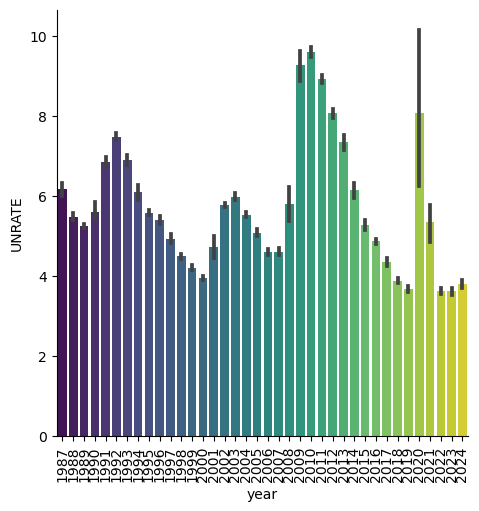

In [151]:
# PLOT FOR UNRATE 
plt.figure(figsize=(15, 10))
graph('UNRATE','bar')
plt.xticks(rotation=90)
plt.show()

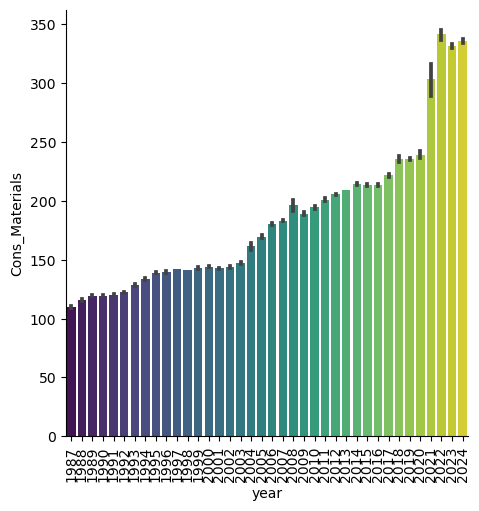

In [152]:
#PLOT GRAPH FOR Cons_Materials
graph('Cons_Materials','bar')
plt.xticks(rotation=90)
plt.show()

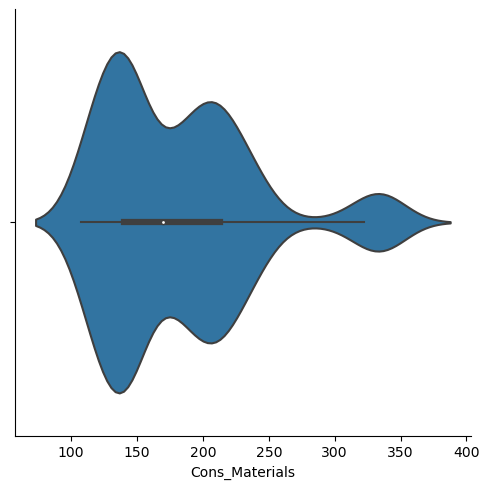

In [174]:
# PLOT VIOLIN GRAPH FOR Cons_Materials
sns.catplot(data=df,x="Cons_Materials",kind='violin')
plt.show()

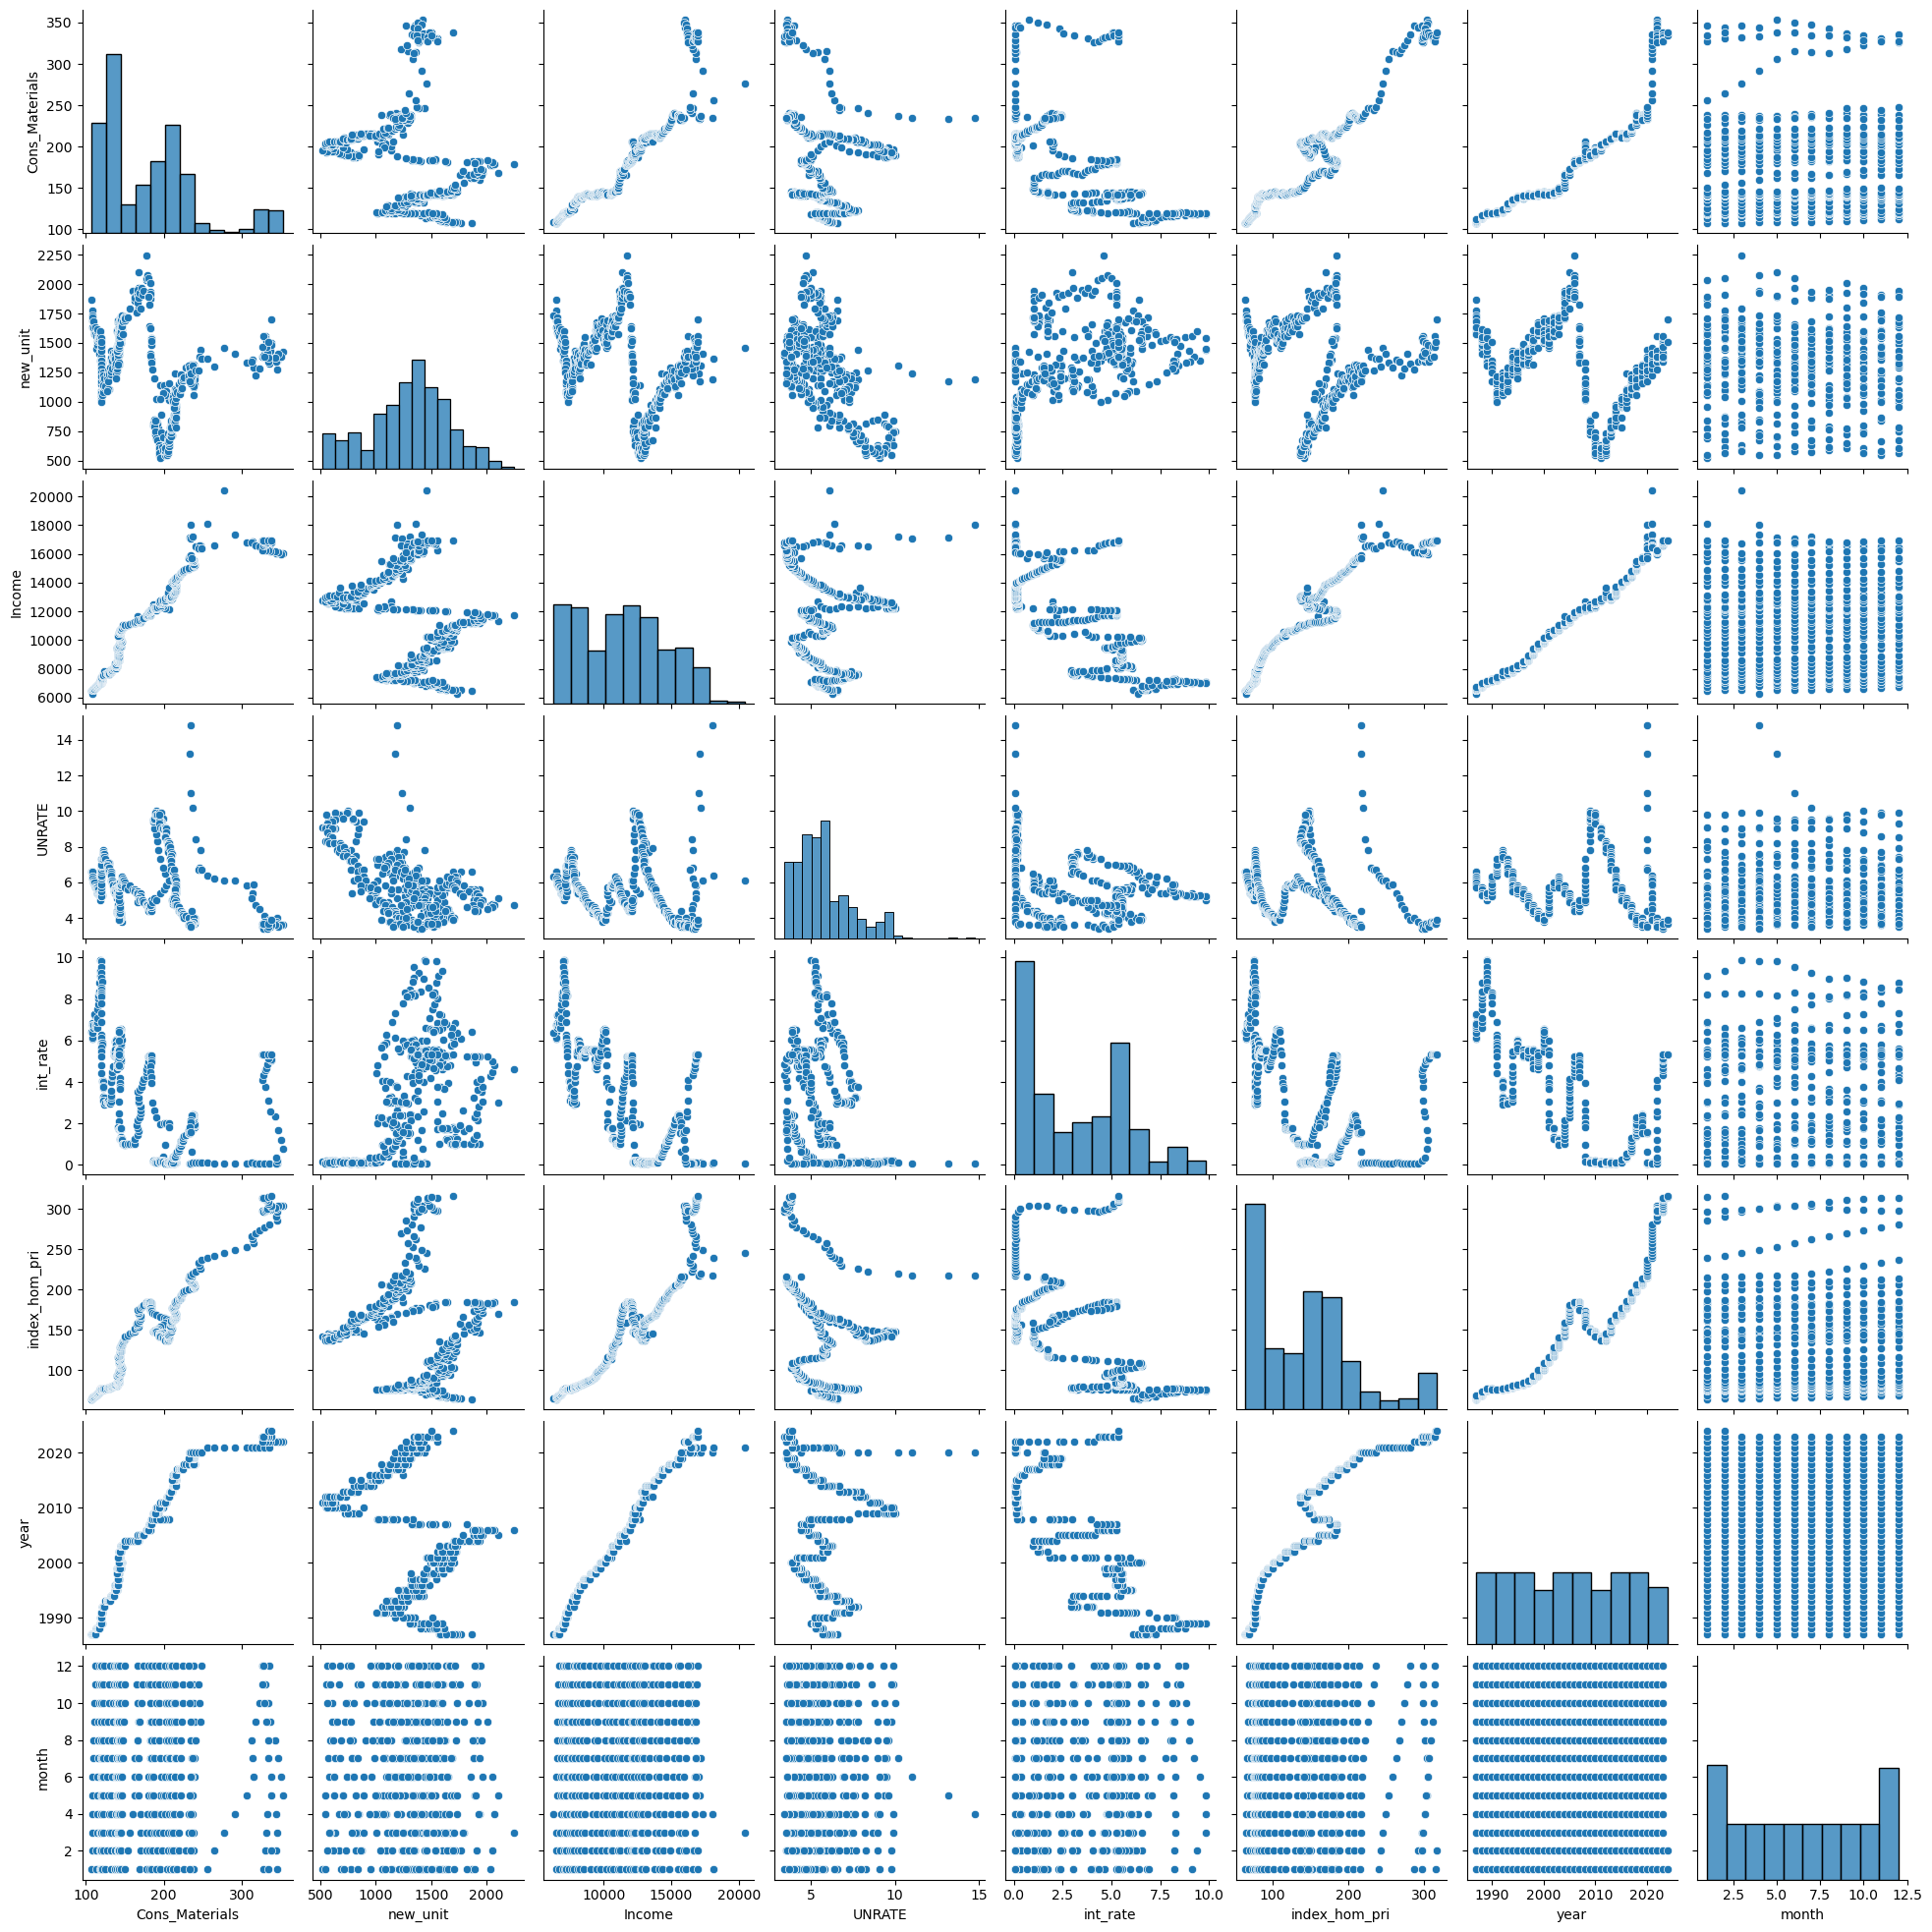

In [154]:
#PLOT PAIR PLOT
sns.pairplot(data=df)
plt.show()

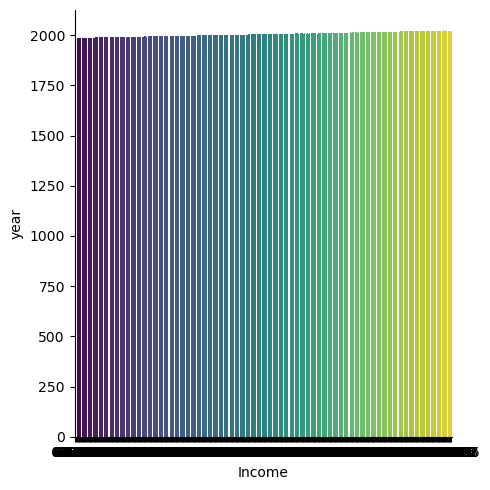

In [155]:
sns.catplot(data=df,x='Income',y='year',kind='bar',palette="viridis")
plt.show()

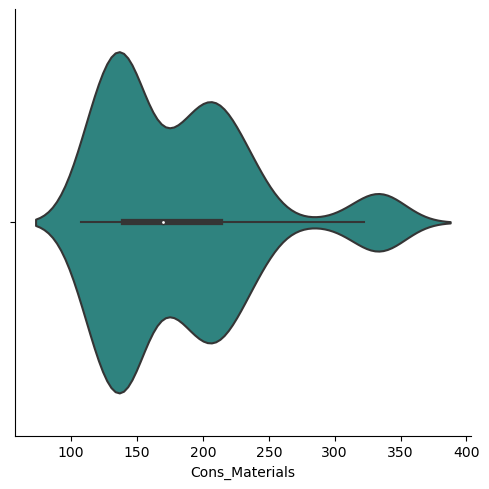

In [156]:
sns.catplot(data=df,x='Cons_Materials',kind='violin',palette="viridis")
plt.show()

# ML MODEL WORK

In [157]:
# IMPORT ALL ML LIBRARIES 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [158]:
df

,Cons_Materials,new_unit,Income,UNRATE,int_rate,index_hom_pri,year,month
DATE,,,,,,,,
1987-01-01,107.600,1862.0,6494.2,6.6,6.43,63.965,1987,1
1987-02-01,107.900,1771.0,6525.0,6.6,6.10,64.425,1987,2
1987-03-01,108.100,1694.0,6530.5,6.6,6.13,64.735,1987,3
1987-04-01,108.300,1735.0,6282.3,6.3,6.37,65.132,1987,4
1987-05-01,108.300,1713.0,6537.0,6.3,6.85,65.564,1987,5
...,...,...,...,...,...,...,...,...
2023-10-01,328.743,1382.0,16847.8,3.8,5.33,312.946,2023,10
2023-11-01,326.844,1466.0,16912.1,3.7,5.33,313.629,2023,11
2023-12-01,327.644,1557.0,16946.5,3.7,5.33,314.338,2023,12


In [159]:
# here we find that there is no use of year and month 
df.drop(columns=['year','month'],inplace=True)
df

,Cons_Materials,new_unit,Income,UNRATE,int_rate,index_hom_pri
DATE,,,,,,
1987-01-01,107.600,1862.0,6494.2,6.6,6.43,63.965
1987-02-01,107.900,1771.0,6525.0,6.6,6.10,64.425
1987-03-01,108.100,1694.0,6530.5,6.6,6.13,64.735
1987-04-01,108.300,1735.0,6282.3,6.3,6.37,65.132
1987-05-01,108.300,1713.0,6537.0,6.3,6.85,65.564
...,...,...,...,...,...,...
2023-10-01,328.743,1382.0,16847.8,3.8,5.33,312.946
2023-11-01,326.844,1466.0,16912.1,3.7,5.33,313.629
2023-12-01,327.644,1557.0,16946.5,3.7,5.33,314.338


In [160]:
cor=df.corr()
cor

,Cons_Materials,new_unit,Income,UNRATE,int_rate,index_hom_pri
Cons_Materials,1.000000,-0.231594,0.925342,-0.178457,-0.535928,0.960790
new_unit,-0.231594,1.000000,-0.248972,-0.579200,0.510443,-0.044242
Income,0.925342,-0.248972,1.000000,-0.097630,-0.688471,0.934410
UNRATE,-0.178457,-0.579200,-0.097630,1.000000,-0.377322,-0.252639
int_rate,-0.535928,0.510443,-0.688471,-0.377322,1.000000,-0.502955
index_hom_pri,0.960790,-0.044242,0.934410,-0.252639,-0.502955,1.000000


<Axes: >

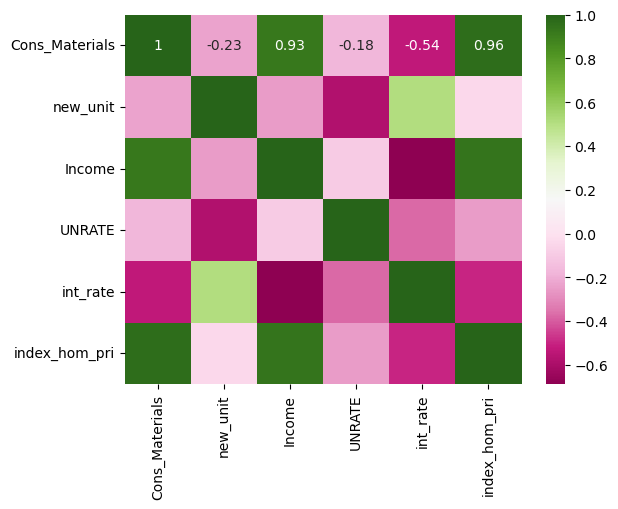

In [161]:
#PLOT HEATMAP
sns.heatmap(data=cor,cmap='PiYG',annot=True)

In [162]:
# Separating the target variable and the independent variable
y = df.pop("index_hom_pri")
X = df

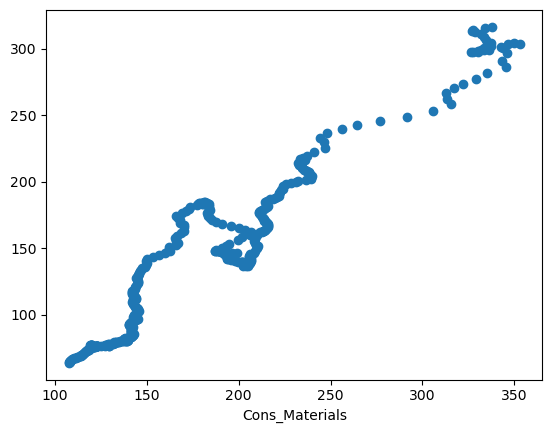

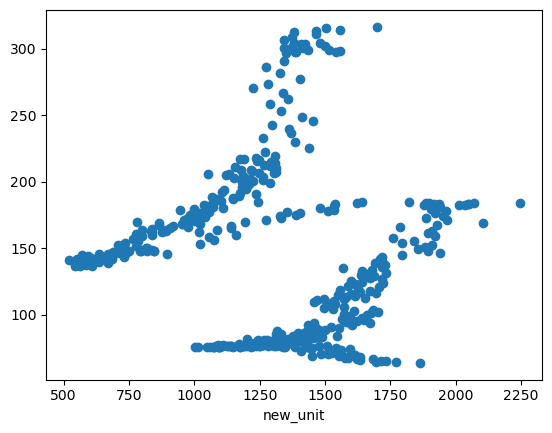

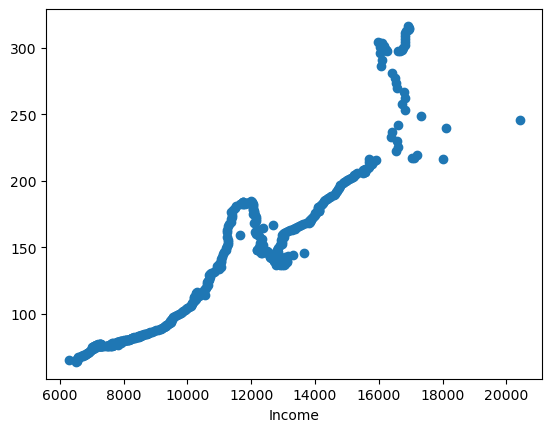

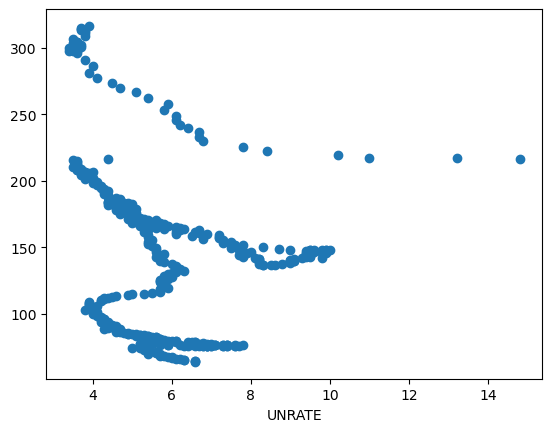

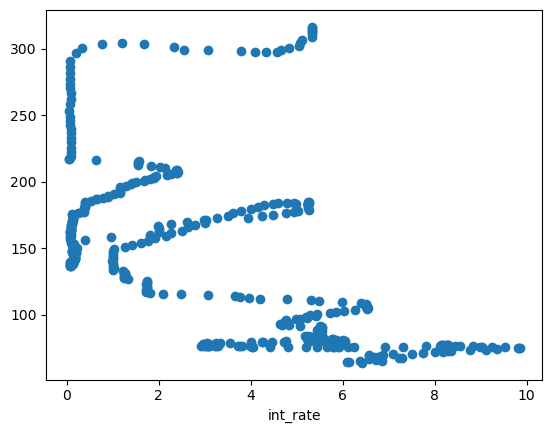

In [163]:

for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y = y)
    plt.xlabel(feature)

In [164]:
# Scaling
scalar = MinMaxScaler()
X = scalar.fit_transform(X)

In [165]:
# Splitting data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size= 0.7, random_state= 42)

In [166]:
X_train

array([[0.00285231, 0.6915942 , 0.01801235, 0.25438596, 0.69387755],
       [0.35939124, 0.36057971, 0.45359009, 0.1754386 , 0.19693878],
       [0.51219363, 0.37971014, 0.76535151, 0.85964912, 0.        ],
       [0.12916896, 0.46724638, 0.13177231, 0.19298246, 0.60816327],
       [0.26526496, 0.80405797, 0.36900207, 0.14035088, 0.40306122],
       [0.53949433, 0.38666667, 0.63331047, 0.02631579, 0.19387755],
       [0.23755679, 0.76463768, 0.35361343, 0.18421053, 0.1744898 ],
       [0.1422081 , 0.61101449, 0.27940001, 0.0877193 , 0.48469388],
       [0.12631665, 0.51768116, 0.13025891, 0.1754386 , 0.60510204],
       [0.38302467, 0.01681159, 0.45423364, 0.49122807, 0.00408163],
       [0.23918668, 0.81217391, 0.38023946, 0.1754386 , 0.21530612],
       [0.05826865, 0.33507246, 0.08662475, 0.35087719, 0.40918367],
       [0.04930424, 0.37855072, 0.06664639, 0.25438596, 0.74081633],
       [0.05011919, 0.4742029 , 0.05792664, 0.16666667, 0.91530612],
       [0.32801581, 0.18898551, 0.

In [167]:
X_valid

array([[0.35164925, 0.06492754, 0.44607257, 0.53508772, 0.01428571],
       [0.4355887 , 0.41971014, 0.5651436 , 0.11403509, 0.03673469],
       [0.13487358, 0.50550725, 0.15561197, 0.15789474, 0.52959184],
       ...,
       [0.35857629, 0.03014493, 0.44354787, 0.52631579, 0.01326531],
       [0.32679339, 0.39130435, 0.41467296, 0.14912281, 0.26122449],
       [0.47389116, 0.39188406, 0.59873553, 0.07017544, 0.1122449 ]])

In [168]:
y_train

DATE
1987-05-01     65.564
2008-05-01    166.657
2020-05-01    216.990
1995-05-01     80.704
2005-11-01    179.680
               ...   
1995-11-01     81.619
2009-07-01    148.407
2016-01-01    177.263
2023-04-01    300.271
1995-07-01     80.938
Name: index_hom_pri, Length: 133, dtype: float64

In [169]:
y_valid

DATE
2010-09-01    143.017
2016-11-01    184.754
1996-10-01     83.377
2022-04-01    300.572
1992-11-01     76.559
               ...   
2015-11-01    175.736
2004-03-01    145.058
2010-07-01    144.989
2008-03-01    170.052
2017-10-01    194.795
Name: index_hom_pri, Length: 313, dtype: float64

In [170]:
# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_valid)
score = r2_score(pred, y_valid)
print("The r2_score for the validation set is: ", score)

The r2_score for the validation set is:  0.9752495210439742


The r2 score is close to 1. It means that the model predicts the target variable with good accuracy.m

In [171]:
#Printing the regression coefficients of different variables
coefs = model.coef_
cols = df.columns
for i in range(len(coefs)):
    print(f"The coefficient for {cols[i]} is {coefs[i]}")

The coefficient for Cons_Materials is 183.46480688269824
The coefficient for new_unit is 68.72409695551092
The coefficient for Income is 111.49322766272516
The coefficient for UNRATE is 25.867804353048143
The coefficient for int_rate is 10.469160280568099


In [172]:
# The intercept
print("The intercept is: ", model.intercept_)

The intercept is:  8.970263352842352


In [173]:
#predicrt the test set result

y_pred=model.predict(X_valid)
y_pred

array([141.67278565, 184.07376259,  95.4338012 , 296.3016754 ,
        70.61998635,  72.63624809, 123.29117631,  76.13047637,
       184.6329278 , 171.68823873,  61.52549937, 110.8088482 ,
       187.83292727, 157.4486932 , 205.56142593, 230.6282396 ,
        75.75809924, 158.15196561, 241.16166175,  73.15364251,
       113.6661561 ,  70.29029636,  81.99453515,  88.07425543,
        95.51273787, 145.49811375,  69.42047197,  75.78640459,
       153.34674538,  71.63072828, 118.4913985 , 308.92825395,
        74.93283876, 170.42725634, 103.63217818, 283.16320143,
       275.28127964,  70.78174535, 201.26511365, 172.26357751,
       170.00560917, 304.09334529,  96.83926134, 303.34195759,
       172.90989852, 185.42010063,  87.36455444, 301.73415757,
        68.77168877,  71.51768001,  95.37022256, 302.65125259,
       140.18359666, 170.66783602,  72.79219967, 208.73682645,
        74.19556091, 144.44078536,  96.01948945,  78.18317982,
        74.91076965, 140.31593704, 148.6943233 ,  68.06